In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas
import glob
import os

In [2]:
def read_ann(filename):
    with open(filename, 'r') as f:
        lines = f.read().splitlines()
    return lines

In [3]:
root_path = 'data/covid19_us_seed_1/rawframes'
anns = read_ann(f'{root_path}/rawframe_train.txt')
anns = [i.split(' ')[0]+'.mp4' for i in anns]
anns = anns[::6]
anns

['Cov_combatting_Image1.mp4', 'Pneu_Avi_Video_003.mp4', 'Reg-nephropocus.mp4']

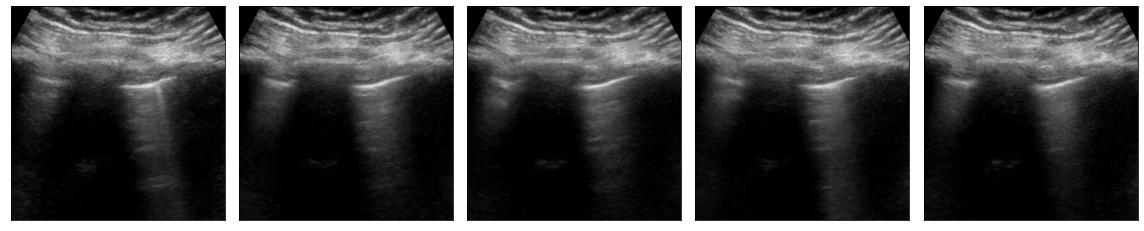

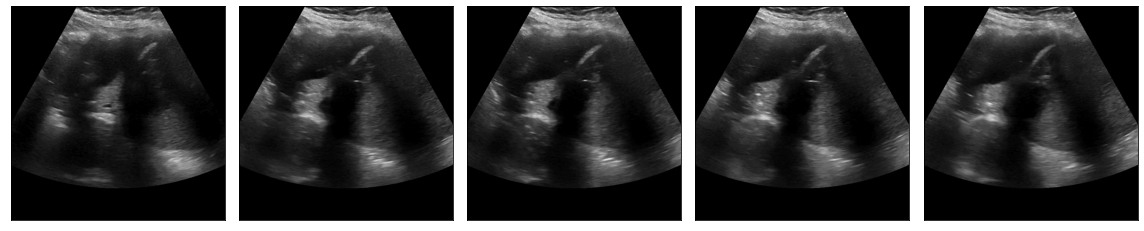

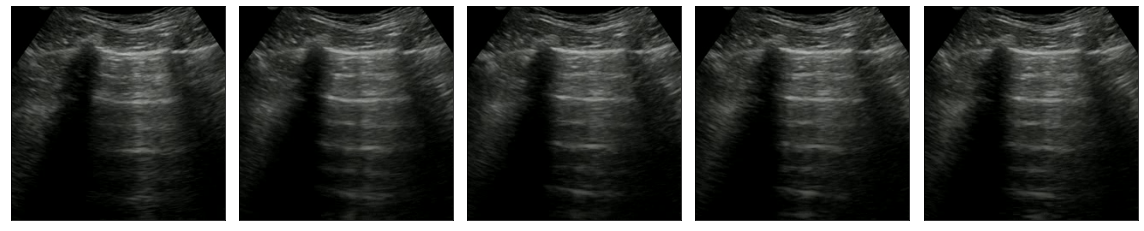

In [4]:
for ann in anns:
    vidcap = cv2.VideoCapture(f'data/covid19_us_seed_1/{ann}')
    success, image = vidcap.read()
    count = 0
    imgs = []
    while success:
        success, image = vidcap.read()
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            imgs.append(image)
    num_imgs = 5
    interval = len(imgs) // num_imgs
    plt.figure(figsize=(16, 8))
    for i in range(num_imgs):
        plt.subplot(1, num_imgs, i+1)
        plt.imshow(imgs[i*interval])
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.savefig(ann.split('/')[0]+'.jpg', dpi=300)
    plt.show()